# Exercise: Clustering Algorithms with Scikit Learn
<img src="../Lab/IMG/sk-logo.png" width=200>

* ***SkLearn*** API Reference: https://scikit-learn.org/stable/modules/classes.html
* ***SkLearn*** Clustering Algorithms: https://scikit-learn.org/stable/modules/clustering.html#clustering

In [5]:
#setup env
import time
import warnings
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

In [25]:
#helper calls
n_samples = 1500
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)

#generating Data Sets A-F
A = datasets.make_circles(n_samples=n_samples, factor=.5,noise=.05)[0]
B = datasets.make_moons(n_samples=n_samples, noise=.05)[0]
C = datasets.make_blobs(n_samples=n_samples, random_state=8)[0]
D = np.random.rand(n_samples, 2)
E = (X_aniso, y)[0]
F = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)[0]
print(A)

[[ 0.13979005  0.43215545]
 [-0.46060927  0.08655972]
 [-0.17309932  0.46992569]
 ...
 [-0.62161428 -0.8106463 ]
 [-0.02653794  0.54485458]
 [ 0.21415252  0.47319235]]


In [26]:
A[:,1]

array([ 0.43215545,  0.08655972,  0.46992569, ..., -0.8106463 ,
        0.54485458,  0.47319235])

## Exercise 1
Plot all raw data sets A-F in one figure. 3x2 oder 2x3 plots

Hints: use MATPLOTLIB ```scatter``` plots and ```subfigures```.

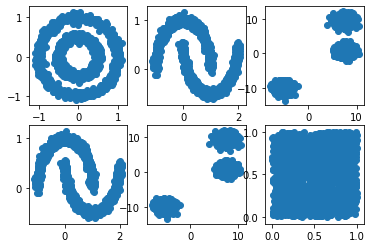

In [50]:
nrows = 2
ncols = 3

fig, axes = plt.subplots(nrows = nrows ,ncols = ncols)
ds = [A,B,C,D,E,F]
for i in range(nrows):
    for j in range(ncols):
        axes[i,j].scatter(ds[i+j][:,0],ds[i+j][:,1])
        

## Exercise 2
Perform ```K-Means``` clustering on all data sets: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans
* 2.1 plot all results
* 2.2 manually try to find the best $k$ for each data set (by visual evaluation)
* 2.3 Use the ```K-Means++``` initialization 

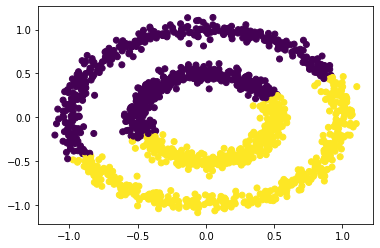

In [72]:
k=2

K_means = cluster.KMeans(n_clusters=int(k),init='k-means++').fit(A)
fig, axes = plt.subplots(1)
axes.scatter(A[:,0],A[:,1],c=K_means.labels_)

TypeError: float() argument must be a string or a number, not 'KMeans'

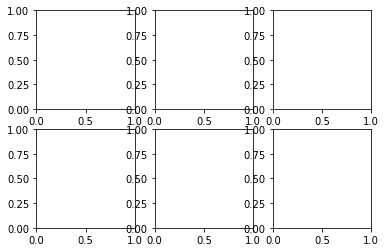

In [74]:

nrows = 2
ncols = 3

fig, axes = plt.subplots(nrows = nrows ,ncols = ncols)
ds = [A,B,C,D,E,F]
k = [2,2,2,2,2,2]
K_means=np.zeros_like(ds)
for i in range(nrows):
    for j in range(ncols):
        K_means[i+j] = cluster.KMeans(n_clusters=int(k[i+j]),init='k-means++').fit(ds[i+j])
        axes[i,j].scatter(ds[i+j][:,0],ds[i+j][:,1],c = K_means[i+j].labels_)


## Exercise 3
Performs ```DBSCAN``` clustering on all data sets and plot all results: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN
